## Note
The repository that corresponds to this notebook can be found [here](https://github.com/michaeldunnpro/mddunn-thesis). Copies exported to PDF include code; this will be adapted or truncated in the final version of the thesis.

In [7]:
import numpy as np
from diamond_simulations import config as cfg

This notebook is a simulation of a PIN alphavoltaic. The purpose of this notebook is to verify that our stopping power framework correctly reproduces experimentally observed results.
(In progress)
## Material Parameters and References
For SiC, we use the following parameters:

| Parameter | Value | Source | Description |
| --- | --- | --- | --- |
| $\rho$ | 3.21 $\text{g/cm}^3$ | [1] | Mass density |

This is a two-element material, so we compute the density of each species. Note that carbon and silicon have atomic weights
of 12.01 u and 28.09 u, respectively, and atomic numbers of 6 and 14, respectively. We assume a 1:1 ratio of carbon to silicon atoms in the material.
We can recover the density of each species as 
$$ \rho_{\alpha, s} = \frac{\rho_s}{M_s} = f_s \frac{\rho}{M_s} $$
where $f_s$ is the mass fraction of species $s$. 
$$ N = Z_s \rho_{\alpha, s} $$
with the atomic number $Z_s$ assigned per species as 6 for carbon and 14 for silicon.

In [8]:
# Assume these are constants for each simulation notebook
AMU_TO_G = 1.66054e-24
CM3_TO_M3 = 0.01**3
M_CARBON = 12.011*AMU_TO_G # Mass of carbon atom in g
M_SILICON = 28.09*AMU_TO_G
M_TOT = M_CARBON + M_SILICON
F_SILICON = M_SILICON/M_TOT
F_CARBON = M_CARBON/M_TOT
RHO_CARBON = F_CARBON*(3.51/CM3_TO_M3)/M_CARBON # Atomic density in 1/M^3
RHO_SILICON = F_SILICON*(3.51/CM3_TO_M3)/M_SILICON # Atomic density in 1/M^3
print(RHO_CARBON)
print(RHO_SILICON)

5.271115980464933e+28
5.271115980464933e+28


I have abstracted these parameters into a material in config.py, which I will import now:

# Simulation

Before we begin simulating, we need to point python to the location of the RustBCA folder and a folder to output our results to. These paths are set in the cell below, and are set automatically by the makefile.

In [9]:
from IPython.display import clear_output
from diamond_simulations import config as cfg

rustbca_dir = cfg.RUSTBCA_PATH
output_dir = cfg.DEFAULT_OUTPUT_DIR

The following cells contain code for running simulations of helium ions accelerated into a silicon carbide transducer. The following collision geometry is used for all simulations:

<style>
/* Center + size */
img[alt="bca_geometry.png"],
img[alt="bcasetup.png"] {
  display: block;
  margin-left: auto;
  margin-right: auto;
  width: 15%;
  max-width: 500px;
  height: auto;
}

/* Theme-adapt (dark mode) for B/W diagrams */
@media (prefers-color-scheme: dark) {
  img[alt="bca_geometry.png"],
  img[alt="bcasetup.png"] {
    filter: invert(1) brightness(1.05) contrast(1.1);
  }
}

body.jp-mod-theme-dark img[alt="bca_geometry.png"],
body.jp-mod-theme-dark img[alt="bcasetup.png"],
body[data-jp-theme-light="false"] img[alt="bca_geometry.png"],
body[data-jp-theme-light="false"] img[alt="bcasetup.png"],
.vscode-dark img[alt="bca_geometry.png"],
.vscode-dark img[alt="bcasetup.png"] {
  filter: invert(1) brightness(1.05) contrast(1.1);
}
</style>

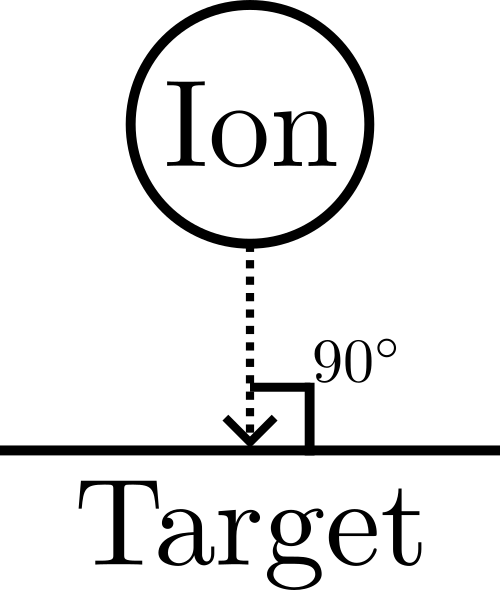

We take the surface binding energy, bulk binding energy, and displacement energy as zero for all simulations, given our focus primarily lies in the stopping power computation rather than implantation or sputtering yields.


In [ ]:
import numpy as np
from diamond_simulations import config as cfg
from diamond_simulations.bindings import (
    build_geometry_0d,
    build_material_parameters,
    run_species_simulation,
)

sic = cfg.diamond
hydrogen = cfg.hydrogen
helium = cfg.helium
lithium = cfg.lithium
options = cfg.options

run_sim = True
mode = "0D"
number_ions = 10000
angle = 50.0
energy_read_range = np.linspace(
    2000,
    26000, # 2.4 micron. depletion region
    10001,
 )

geometry_0d = build_geometry_0d(sic)
material_parameters = build_material_parameters(sic)

## Helium

In [27]:
Z = 2
helium_energies = np.array([1.25/4, 1.95/4, 2.95/4])

run_species_simulation(
    species=helium,
    energies_mev_per_amu=helium_energies,
    output_filename="sic_he_stopping_powers.csv",
    rustbca_dir=rustbca_dir,
    output_dir=output_dir,
    options=options,
    material_parameters=material_parameters,
    geometry_input=geometry_0d,
    run_sim=run_sim,
    mode=mode,
    number_ions=number_ions,
    angle_deg=50.0,
    energy_read_range=energy_read_range,
    clear_output=clear_output,
 )

Helium ion simulation and data processing complete.


,Incident Energy (MeV/amu),Stopping Power (KeV/um/Z^2),Percent Energy Loss (%)
0,0.3125,123.298755,94.631886
1,0.4875,215.325693,105.937583
2,0.7375,255.844681,83.203806


In [24]:
(124.5*2.4*4)/1250


0.95616

# References

[1] T. Kimoto and J. A. Cooper, *Fundamentals of Silicon Carbide Technology: Growth, Characterization, Devices and Applications*, 1st ed. (John Wiley & Sons Singapore Pte. Ltd., Singapore, 2014).

[2] P. J. Mohr, D. B. Newell, B. N. Taylor, and E. Tiesinga, "CODATA recommended values of the fundamental physical constants: 2022," *Reviews of Modern Physics* **97**, 1 (2025).

[3] J. Gong, K. Ansari, H. Jin, and J. A. van Kan, "Cross-Sectional Investigation of Multihigh-Energy Proton-Implanted Single Crystalline Diamond," *Physica Status Solidi (a)* **218**, 2000102 (2021).

[4] T. Prohaska *et al.*, "Standard atomic weights of the elements 2021 (IUPAC Technical Report)," **94**, 573 (2022).


[5] A. Crnjac, M. Jakšić, M. Matijević, M. Rodriguez-Ramos, M. Pomorski, and Z. Siketić, Energy loss of MeV protons in diamond: Stopping power and mean ionization energy, _Diamond and Related Materials_ **132**, 109621 (2023).


[6] R. W. Fearick and J. P. F. Sellschop, Energy loss of light ions in diamond, _Nuclear Instruments and Methods_ **168**, 51 (1980).
